### Importamos as bibliotecas

In [41]:
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

### Criamos uma função que recebe o nome do arquivo de dado como argumento e retorna: a latitude e longitude da estação; o nome da primeira cidade mais próxima da estação de medida

In [42]:
def latlong_cidade(local_arquivo):
    arquivo = open(local_arquivo)
    linha = arquivo.readlines()[4:5]
    texto = ''.join(linha)
    latlong = texto.split()[1:5]
    latlong = ''.join(latlong)
    arquivo = open(local_arquivo)
    linha = arquivo.readlines()[35:36]
    texto = ''.join(linha)
    texto = texto.split(',')[0]
    cidade = texto.split(':')[1][+1:]
    return(latlong,cidade)
#Testando funcão
latlong_cidade("./dados/0.80S-49.02W-TAVG-Trend.txt")

('0.80S,49.02W', 'BelÃ©m')

### Criamos uma função que recebe o nome do arquivo de dado como argumento e retorna: um numpy array da temperatura anual estimada, que será a soma da temperatura absoluta estimada com a anomalia anual.

In [43]:
def temperatura_anual_estimada(local_arquivo):
    arquivo = open(local_arquivo)
    linha = arquivo.readlines()[47:48]
    texto = ''.join(linha)
    temperatura_absoluta_estimada = texto.split()[8]
    temperatura_absoluta_estimada = float(temperatura_absoluta_estimada)
    dados = np.loadtxt(local_arquivo, comments="%")
    anom_1ano = np.nan_to_num(dados[:,4])
    return anom_1ano + temperatura_absoluta_estimada
#Testando funcão
temperatura_anual_estimada("./dados/0.80S-49.02W-TAVG-Trend.txt")

array([ 26.74 ,  26.74 ,  25.868, ...,  26.74 ,  26.74 ,  26.74 ])

### Plotamos gráficos da temperatura anual estimada para cada estação da pasta dados referente a uma cidade, com o título de cada gráfico contendo a latitude e longitude.

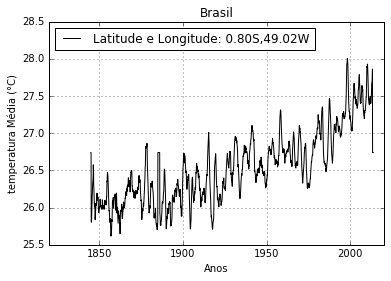

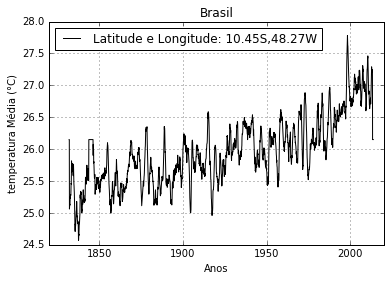

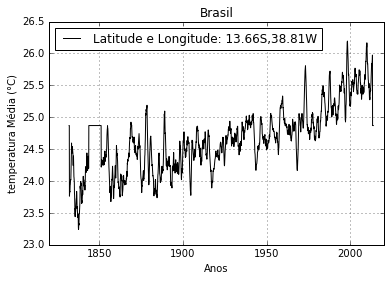

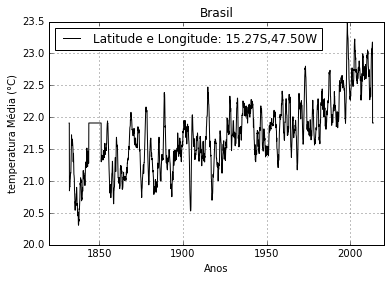

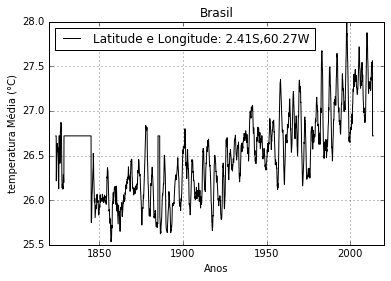

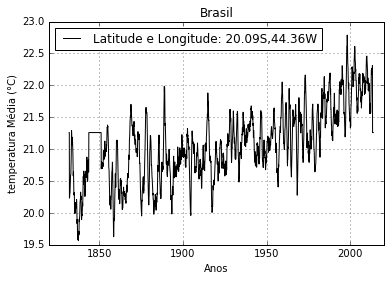

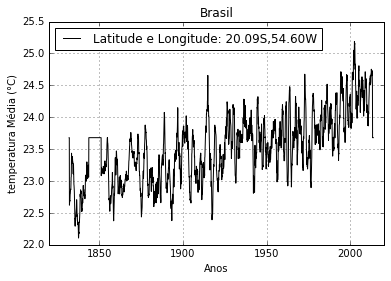

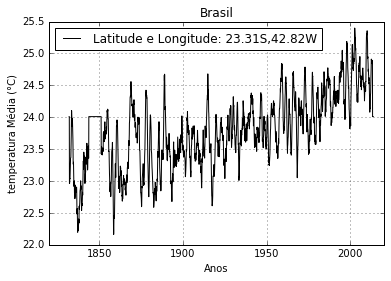

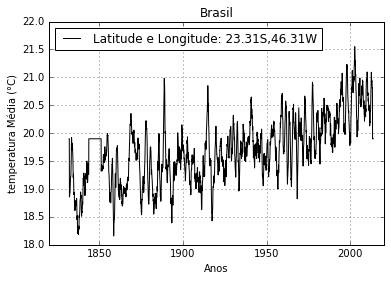

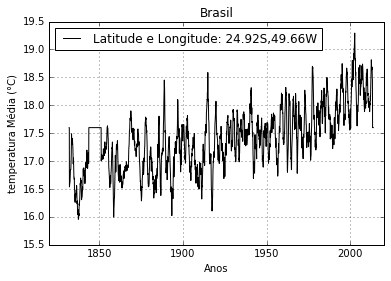

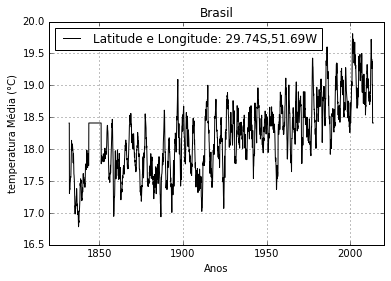

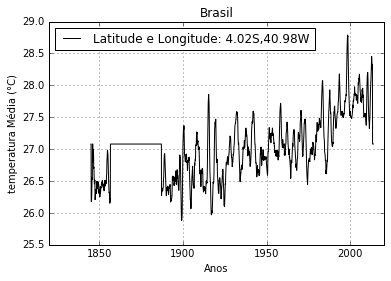

In [44]:
# Usando a biblioteca glob para criar uma lista com todos os arquivos .txt dentro da pasta dados
arquivos = glob.glob("dados\\*.txt")
for arquivo in arquivos:
    #Todo arquivo que comece como definido retorna o valor "true", então para todo restante("false") executamos o seguinte.
    if arquivo.startswith("dados\\brazil") is False:
        #Chamamos arquivo de "dados" e carregamos arquivo definindo que comentários comecam com "%".
        dados = np.loadtxt(arquivo, comments = "%")
        
        anom_1ano = temperatura_anual_estimada(arquivo)
        lat_long = latlong_cidade(arquivo)[0]
        nome_local = latlong_cidade(arquivo)[1]
        array = np.loadtxt(arquivo, comments='%')
        ano = array[:,0]
        mes = array[:,1]
        ano_decimal = ano + (mes - 1) /12
        
        plt.figure()
        #Plotamos o gráfico.
        plt.plot(ano_decimal, anom_1ano, 'black',label="Latitude e Longitude: " + lat_long)
        #nomeamoss os eixos
        plt.ylabel("temperatura Média (°C)")
        plt.xlabel ("Anos")
        #Adicionamos legenda.
        plt.legend(loc="upper left")
        #adicionamos grade.
        plt.grid(True) 
        #Definimos a escala do gráfico.
        plt.xlim(1820,2020)
        #Adicionamos título
        plt.title("Brasil")
        
        #Nomeamos e salvamos as figuras em uma pasta manualmente criada
        plt.savefig("C:\\Users\\JPedr\\python-4-snoufes\\figuras\\" + nome_local.replace(' ','_') + ".png")